# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the *synth1* data into python using the *loadmat* function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided *clusterPlot()* function.
 + *In Python, you can use the function k_means() from the package sklearn.cluster to compute *k*-means clustering.*
 + *Type clusterPlot(X,clusters,centroids,y) to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


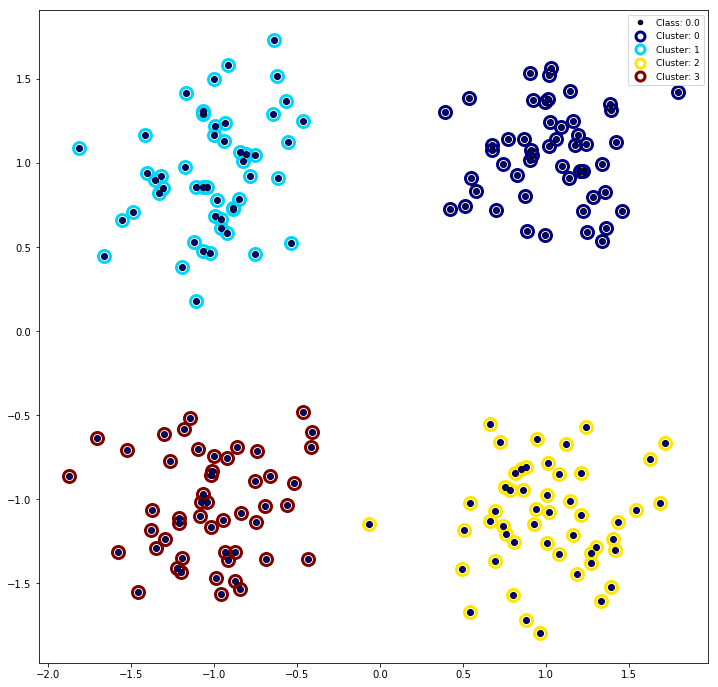

ABOVE: Scatterplot for clustering of Synth1


In [2]:
##Answer to question 4.1.1a
import numpy as np
import sklearn.cluster
import scipy.io
import sklearn
from Toolbox.clusterPlot import clusterPlot
from Toolbox.clusterVal import clusterVal
import matplotlib.pyplot as plt

# Load the data
synth=scipy.io.loadmat('Data/synth1.mat')

# Fit the K-means clustering and extract attributed
Kmeansynth=sklearn.cluster.KMeans(n_clusters= 4).fit(synth['X']) 
centroids=Kmeansynth.cluster_centers_
clusters=Kmeansynth.labels_

# Figure for the synth1 clustering
plt.figure(figsize=(12,12))
clusterPlot(synth['X'],clusters,centroids,synth['y'])
plt.show()

print('ABOVE: Scatterplot for clustering of Synth1')

> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

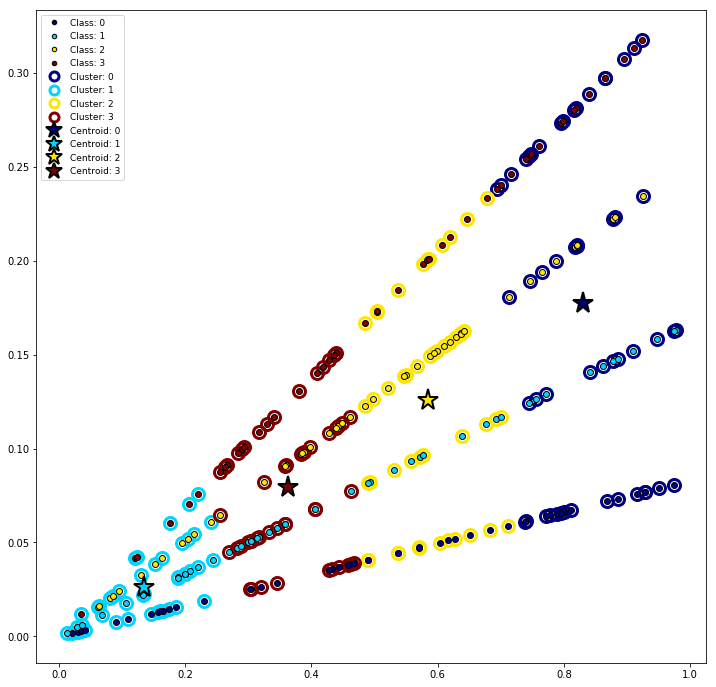

ABOVE: Scatterplot for clustering of Synth1


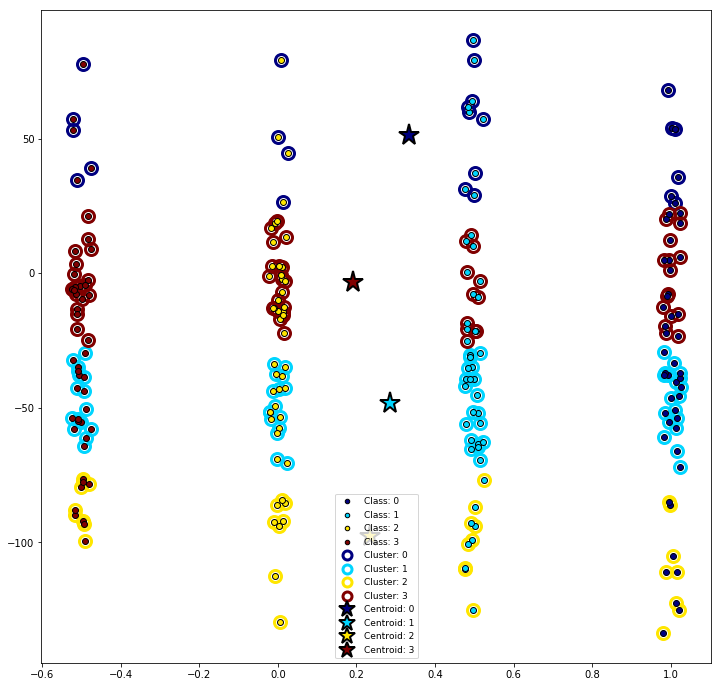

ABOVE: Scatterplot for clustering of Synth2


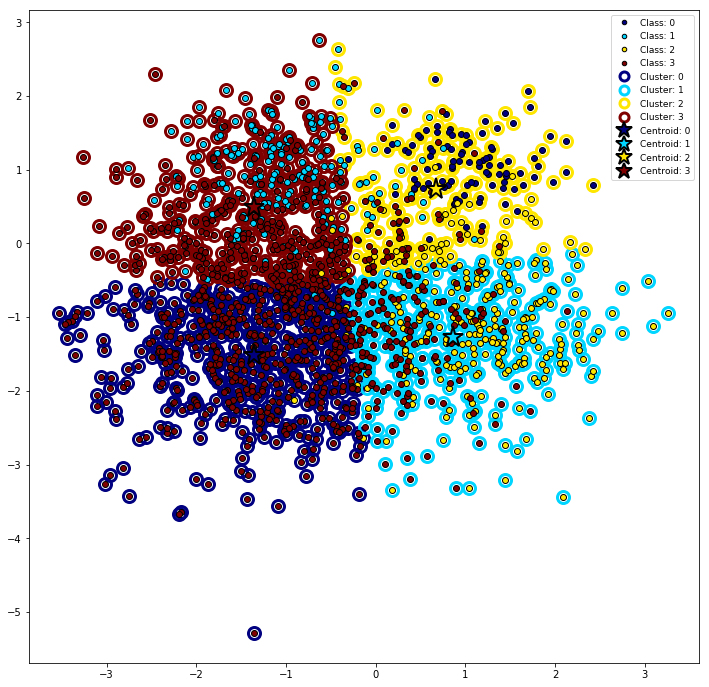

ABOVE: Scatterplot for clustering of Synth3


In [5]:
##Answer to question 4.1.1b

for i in range(3):
    synth=scipy.io.loadmat('Data/synth'+str(i+2)+'.mat')

    Kmeansynth=sklearn.cluster.KMeans(n_clusters= 4).fit(synth['X']) 
    centroids=Kmeansynth.cluster_centers_
    clusters=Kmeansynth.labels_
    
    
    plt.figure(figsize=(12,12))
    clusterPlot(synth['X'],clusters,centroids,synth['y'])
    plt.show()
    print('ABOVE: Scatterplot for clustering of Synth'+str(i+1))

Does the clustering coincide with the true classes? Explain for every data set.


For Synth2:
Definitely not. The true classes are organised in lines with the same origin, and run quite close to one another. The k-means algorithm has trouble when clusters are not globular unless they are exceptionally well seperated, which is not the case here.

For Synth3:
It's no good. Even though the true clusters are not globular, we might have a shot at finding the true clusters if we're lucky with initialization, !BUT! for this we would have to normalize the attributes. Right now the y-axis attribute has a far greater range of values than the x-axis does and this strongly affects the sum of squares minimalization towards preferring to minimize the y-axis attribute, whereas our clusters are separated along the x-axis.

For Synth4:
Not as bad as the previous attempts but still a pretty poor fit. Even though these clusters appear to be globular, they also have different sizes and are overlapping. This spells trouble for the k-means algorithm. It seems to just divide the cloud in 4 more-or-less equal parts.



Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

In [80]:
##Answer to question 4.1.2a

#Initialize array to store validity measures (dataset x clusters x validity measure)
validities=np.zeros((4,10,4))

for i in range(4):
    for k in range(10):
    
        synth=scipy.io.loadmat('Data/synth'+str(i+1)+'.mat')

        Kmeansynth=sklearn.cluster.KMeans(n_clusters= k+1).fit(synth['X']) 
        centroids=Kmeansynth.cluster_centers_
        clusters=Kmeansynth.labels_
        
        validities[i][k]=clusterVal(synth['y'], clusters)  # Call clusterVal and store the values

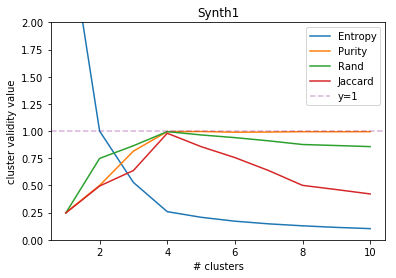

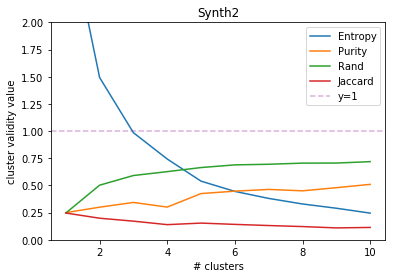

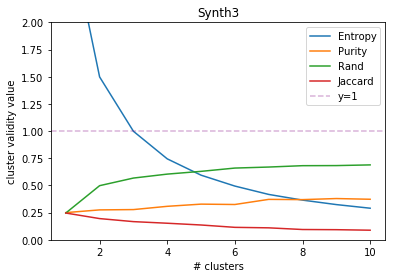

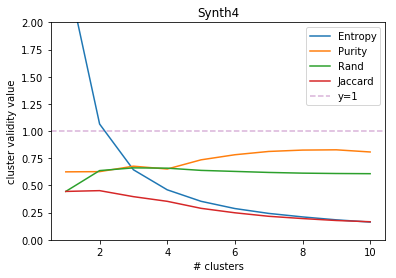

Cluster validity values as a function of k, for the four Synth datasets


In [239]:
for i in range(4): # for each dataset

    plt.plot(range(1,11),validities[i,:,0], label='Entropy')
    plt.plot(range(1,11),validities[i,:,1], label='Purity')
    plt.plot(range(1,11),validities[i,:,2], label='Rand')
    plt.plot(range(1,11),validities[i,:,3], label='Jaccard')
    plt.axhline(y=1, label='y=1', color='purple', linestyle='dashed', alpha=0.3)
    
    plt.legend()
    plt.title('Synth'+str(i+1))
    plt.ylim(0,2)
    plt.xlabel('# clusters')
    plt.ylabel('cluster validity value')
    plt.show()

print('Cluster validity values as a function of k, for the four Synth datasets')

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?


Unsupervised: To help identify a good number of clusters, rather than only minimizing the within cluster differences (or cohesion), we can also try to simultaneously maximize between cluster differences (or separation). This means that if we have a situation with clear clustering, and we move to the point where k is greater than the number of natural clusters, one of the clusters will now be split and - even though within cluster differences are now SLIGHTLY decreased - we could lose a LARGER amount of between cluster differences, and this is reflected in a lower value of our cluster validity measure (which can be some ratio of the two).

Supervised (as is the case above for jaccard and rand): Because we have a model for what we consider to be the true clustering, the values for these measures will be highest at the point where the number of clusters we use is equal to the number of 'true' clusters. Anything else (higher or lower amount of k) will result in diminished similarity between the cluster similarity matrices used to compute these values.


When more than four clusters are used to model the data we can identify (in Synth1) a 'knee' in the rand and jaccard functions where the validity value starts decreasing. This would suggest that 4 could be the optimal number of clusters (which in this case is obvious from visual inspection of the cool scatterplot!).


*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command imshow(np.reshape(X[k,:],(c,x,y)).T) which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


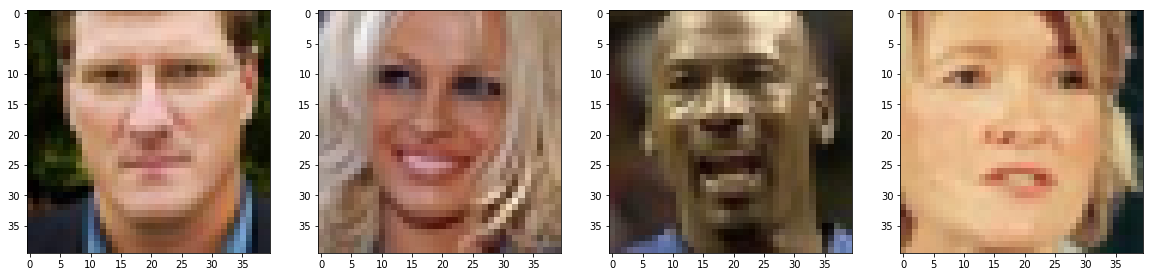

the first four original images


In [168]:
##Answer to question 4.1.3a

wildfaces=scipy.io.loadmat('Data/wildfaces')
wfX=wildfaces['X']

#Plot some original images
plt.figure(figsize=(20,10)) 
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(wfX[i,:],(3,40,40)).T)
plt.show()

print('the first four original images')

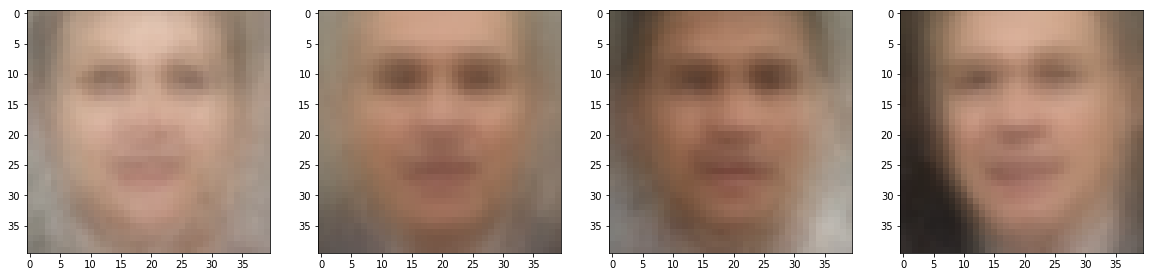

The first four centroids for k=10


In [170]:
#For k=10

Kmeanswf=sklearn.cluster.KMeans(n_clusters= 10).fit(wfX) 
centroids=Kmeanswf.cluster_centers_
clusters=Kmeanswf.labels_

plt.figure(figsize=(20,10)) 
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(centroids[i,:],(3,40,40)).T)
plt.show()

print('The first four centroids for k=10')

> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

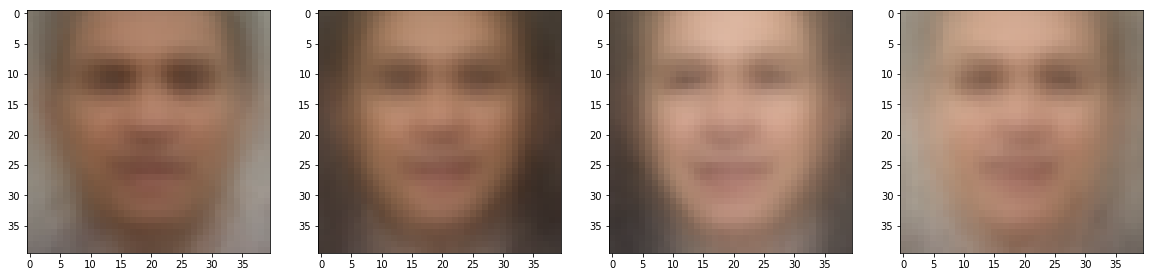

The four centroids for k=4


In [169]:
#For k=4

Kmeanswf=sklearn.cluster.KMeans(n_clusters= 4).fit(wfX) 
centroids=Kmeanswf.cluster_centers_
clusters=Kmeanswf.labels_

plt.figure(figsize=(20,10)) 
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(centroids[i,:],(3,40,40)).T)
plt.show()

print('The four centroids for k=4')

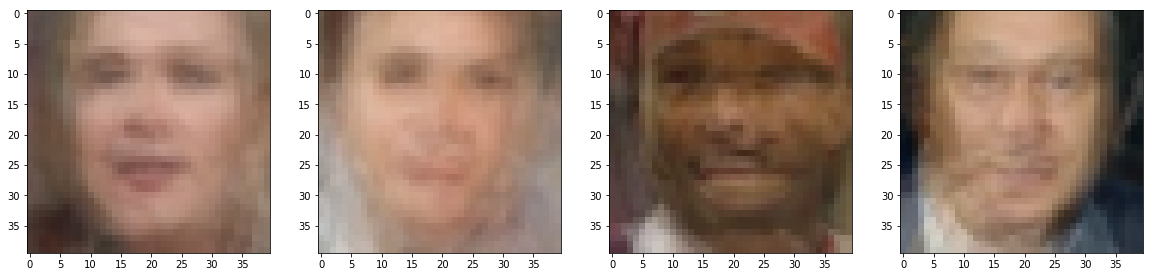

The first four centroids for k=100


In [171]:
#For k=100

Kmeanswf=sklearn.cluster.KMeans(n_clusters= 100).fit(wfX) 
centroids=Kmeanswf.cluster_centers_
clusters=Kmeanswf.labels_

plt.figure(figsize=(20,10)) 
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(centroids[i,:],(3,40,40)).T)
plt.show()

print('The first four centroids for k=100')

Very poorly recognisable at k=4, they are very smoothed, blended, average images (as is to be expected - a centroid being an average of a particular cluster, and the clusters are large here). k=10 is slightly less blurry, but still nowhere near recognisable. When i tried k=100, the recognisability is improved, and some images become particularly recognisable. This might be because some centroids represent particularly small clusters here and hence the image is not as blurry. Still, there is a lot of smearing in the images.

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter cmap=cm.binary to the function imshow().

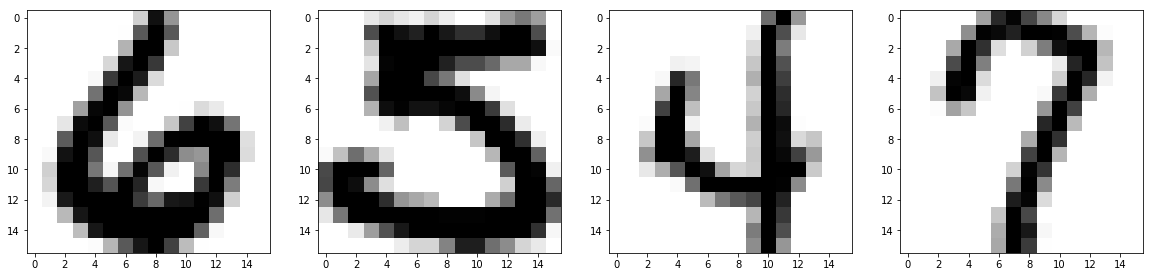

the first four original images


In [20]:
##Answer to question 4.1.4a

digits=scipy.io.loadmat('Data/digits')
digitX=digits['X']
digity=digits['y']

#Plot some original images
plt.figure(figsize=(20,10)) 
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(digitX[i,:],(16,16)), cmap=plt.cm.binary )
plt.show()

print('the first four original images')

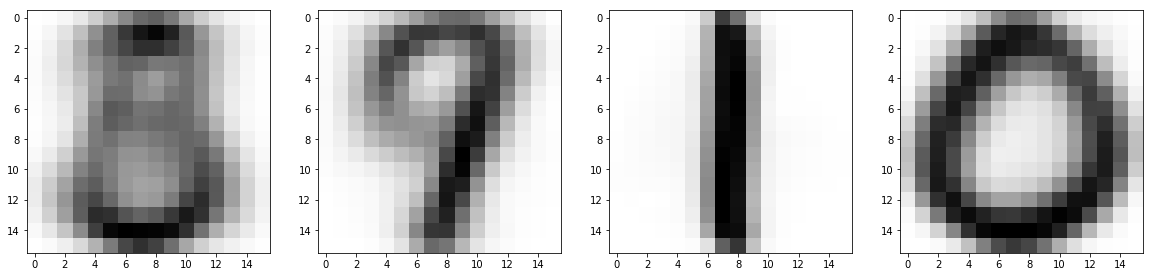

The four centroids for k=4


In [21]:
#For k=4

Kmeansdigit=sklearn.cluster.KMeans(n_clusters= 4).fit(digitX) 
centroids=Kmeansdigit.cluster_centers_
clusters=Kmeansdigit.labels_

plt.figure(figsize=(20,10)) 
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(centroids[i,:],(16,16)), cmap=plt.cm.binary )
plt.show()

print('The four centroids for k=4')

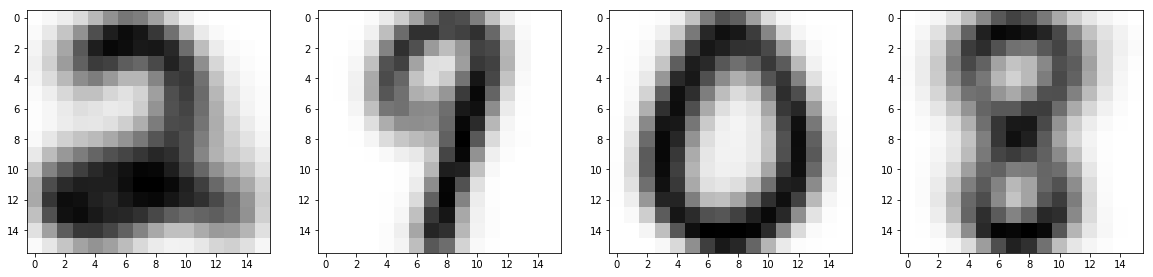

The first four centroids for k=10


In [22]:
#For k=10

Kmeansdigit=sklearn.cluster.KMeans(n_clusters= 10).fit(digitX) 
centroids=Kmeansdigit.cluster_centers_
clusters=Kmeansdigit.labels_

entropy=clusterVal(digity, clusters)[0]

plt.figure(figsize=(20,10)) 
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(centroids[i,:],(16,16)), cmap=plt.cm.binary )
plt.show()

print('The first four centroids for k=10')

In [1]:
#For k=100

Kmeansdigit=sklearn.cluster.KMeans(n_clusters= 100).fit(digitX) 
centroids=Kmeansdigit.cluster_centers_
clusters=Kmeansdigit.labels_

plt.figure(figsize=(20,10)) 
for i in range(4):
    plt.subplot(1,i+1)
    plt.imshow(np.reshape(centroids[i,:],(16,16)), cmap=plt.cm.binary )
plt.show()

print('The first four centroids for k=100')

NameError: name 'sklearn' is not defined

In each of the clusterings, the majority of the digits is well-recognisable, although blurry.

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

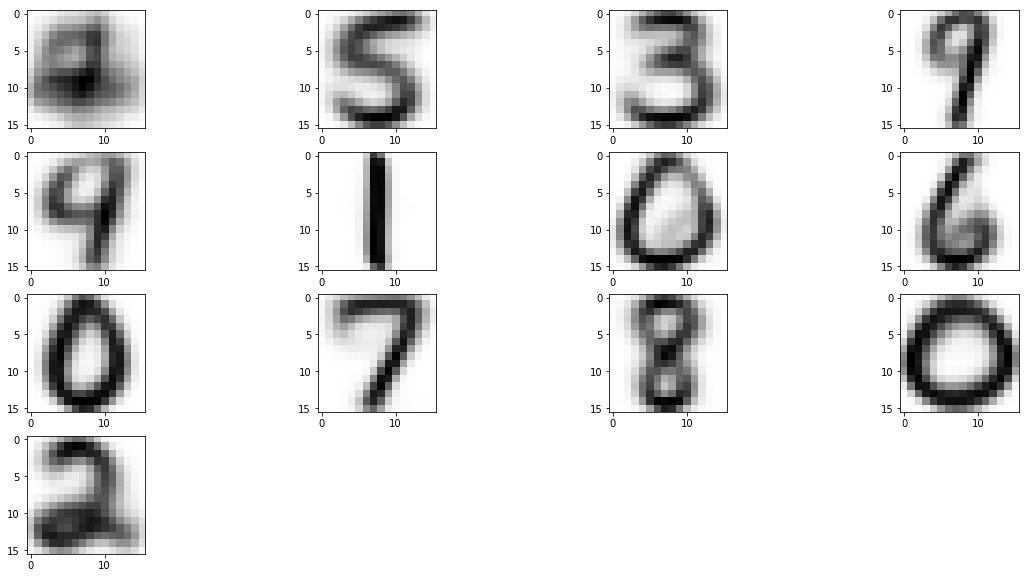

The centroids for k=13 in the digits dataset, now with all digits present


In [240]:
#For k=13

Kmeansdigit=sklearn.cluster.KMeans(n_clusters= 13).fit(digitX) 
centroids=Kmeansdigit.cluster_centers_
clusters=Kmeansdigit.labels_


plt.figure(figsize=(20,10)) 
for i in range(13):
    plt.subplot(4,4,i+1)
    plt.imshow(np.reshape(centroids[i,:],(16,16)), cmap=plt.cm.binary )
plt.show()

print('The centroids for k=13 in the digits dataset, now with all digits present')


In [43]:
def ClusterDigitVals(k):
    Kmeansdigit=sklearn.cluster.KMeans(n_clusters= k).fit(digitX) 
    centroids=Kmeansdigit.cluster_centers_
    clusters=Kmeansdigit.labels_

    vals = clusterVal(digity, clusters)
    return vals


klist=[[x] for x in range(2, 5)]
    

In [35]:
ClusterDigitVals(4)

(0.7681067965185387,
 0.5336835405303388,
 0.7634538562098581,
 0.25335801025149074)

In [36]:
funclist=[ClusterDigitVals for i in klist]

In [44]:
import multiprocessing

n_proc = multiprocessing.cpu_count() + 1
pool = multiprocessing.Pool(processes=2)
proc_results = [
    pool.apply_async(ClusterDigitVals, func_args)
    for func_args in klist]
results = [
    proc_result.get() for proc_result in proc_results]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/tristan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-20ef63689de6>", line 4, in <module>
    pool = multiprocessing.Pool(processes=2)
  File "/Users/tristan/anaconda3/lib/python3.6/multiprocessing/context.py", line 119, in Pool
    context=self.get_context())
  File "/Users/tristan/anaconda3/lib/python3.6/multiprocessing/pool.py", line 156, in __init__
    self._setup_queues()
  File "/Users/tristan/anaconda3/lib/python3.6/multiprocessing/pool.py", line 249, in _setup_queues
    self._inqueue = self._ctx.SimpleQueue()
  File "/Users/tristan/anaconda3/lib/python3.6/multiprocessing/context.py", line 112, in SimpleQueue
    return SimpleQueue(ctx=self.get_context())
  File "/Users/tristan/anaconda3/lib/python3.6/multiprocessing/queues.py", line 314, in __init__
    self._reader, self._writer = connection.Pipe(d

OSError: [Errno 24] Too many open files

There can be a few reasons why 10 clusters do not seem to capture every digit individually. In the original k=10 clustering which i performed, there were two '0' and no '5' centroids. First of all, there are a lot of '0' in the dataset, about 1500 whereas the other numbers are generally around 800. This means that this large cloud of '0' might be more capable of capturing the centroids. It might also be that there is more variability in the way the '0' is written compared to the '5', leading to a larger, more dispersed cluster which also attracts centroids. It can also be explained by the '5' being similar to another digit (e.g. '3') and it being absorbed into this cluster.

At k=13 all digits appear to be individually represented by a centroid.

Looking at the centroids for k=10, it seems the '5' is confused with the '3', and  '4'  with '9'. This makes sense as these digits look graphically very similar, and hence have similar pixel patterns which - due also to some noise variation - can lead them to end up in the same cluster. Furthermore, once we make the step from k=12 to k=13 and the '5' shows up as an independent centroid, the clarity of the '3' centroid is also markedly improved (due to the '5' now no longer being grabbed by this cluster and smearing the centroid). Furthermore, one of the '4' clusters is still exceptionally blurry.

PS: I tried clustering up to k=1500. At this point there is still minor entropy (0.00074) in the dataset, so even at this point some clusters remain somewhat impure. ( I removed this code for cleanliness)

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package *scipy.cluster.hierarchy*. The function *linkage()* forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function *fcluster* extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function *linkage()* computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type *Z = linkage(X, method='single', metric='euclidean')* to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function*fcluster()*. For example, type *cls = fcluster(Z, criterion='maxclust', t=4)* to get a maximum of 4 clusters. Type *help(fcluster)* (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

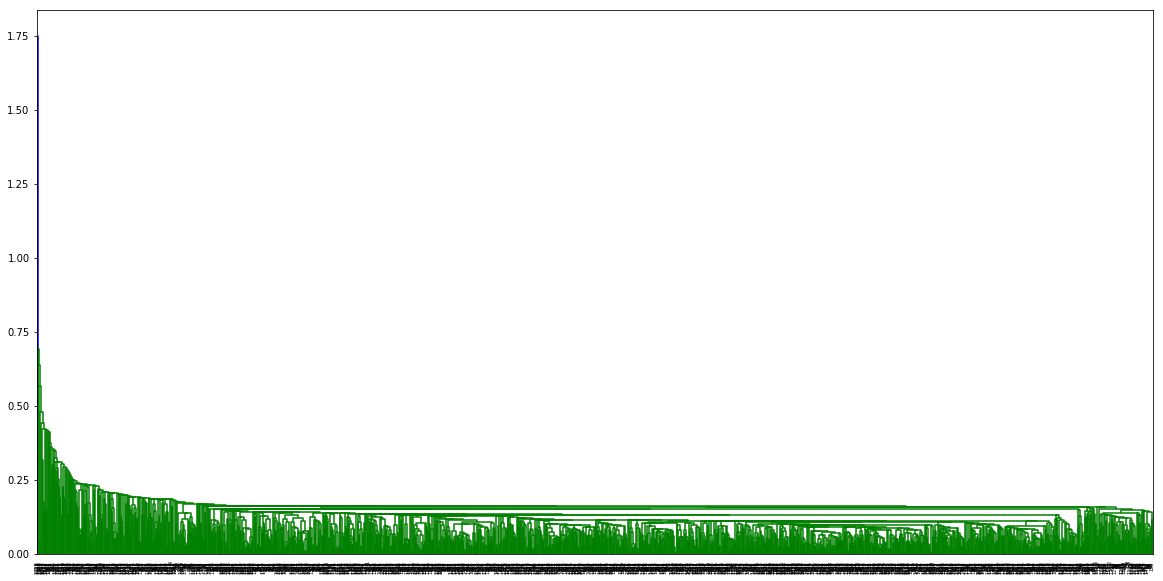

ABOVE: dendrogram for single-link euclidean hierarchical clustering of synth1


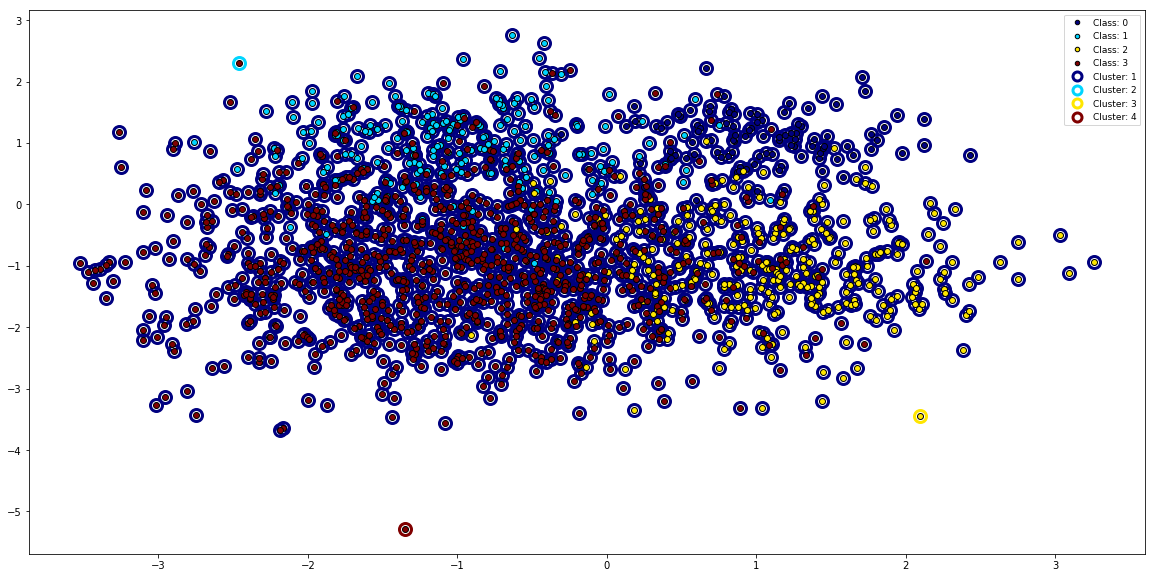

ABOVE: Scatterplot resulting from dendrogram above when regarded at the 4 cluster level.


In [283]:
##Answer to question 4.2.1a

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# perform the linkage and clustering
Z = linkage(synth['X'], method='single', metric='euclidean')
cls  = fcluster(Z, criterion='maxclust', t=4)


plt.figure(figsize=(20,10)) 
dendrogram(Z)
plt.show()

print('ABOVE: dendrogram for single-link euclidean hierarchical clustering of synth1')

plt.figure(figsize=(20,10)) 
clusterPlot(synth['X'],cls,y=synth['y'])
plt.show()

print('ABOVE: Scatterplot resulting from dendrogram above when regarded at the 4 cluster level.')

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

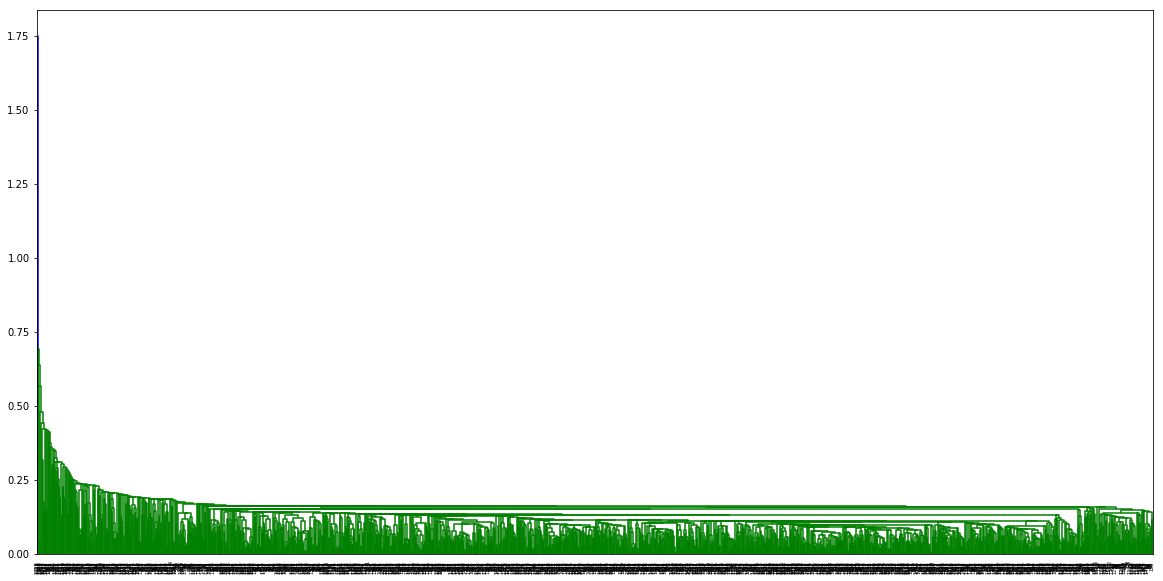

ABOVE: dendrogram for single-link euclidean hierarchical clustering of synth1


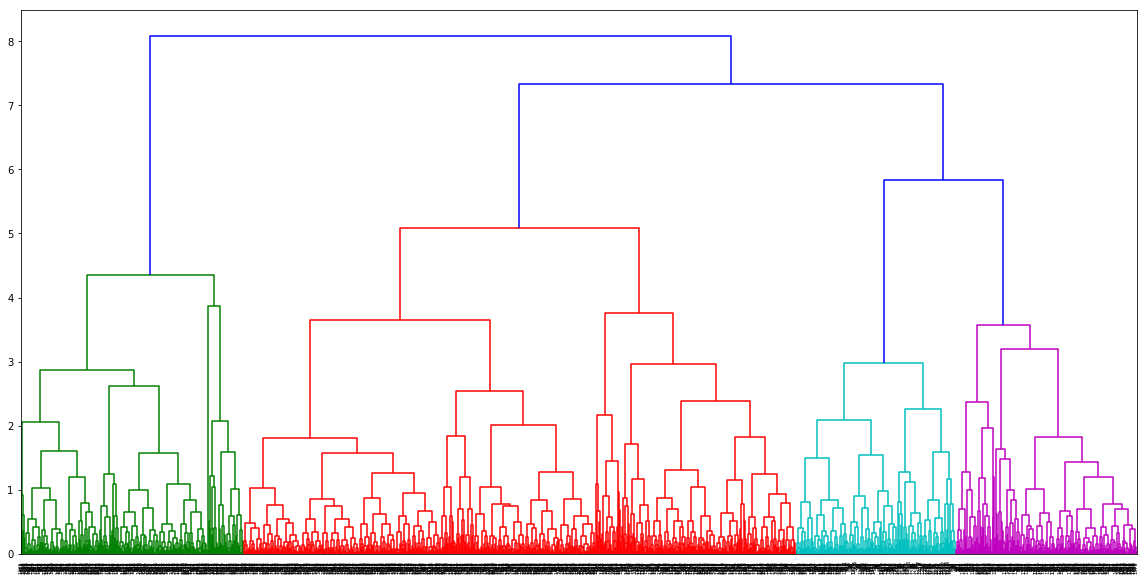

ABOVE: dendrogram for complete-link euclidean hierarchical clustering of synth1.


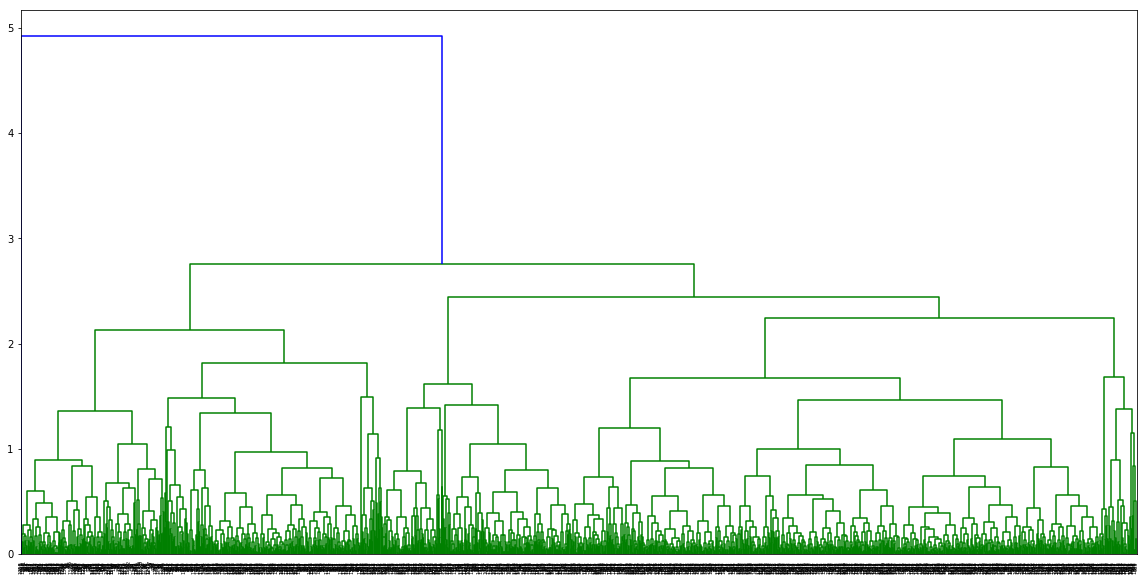

ABOVE: dendrogram for average euclidean hierarchical clustering of synth1.


In [290]:
##Answer to question 4.2.1b

# perform the linkage and clustering
Z = linkage(synth['X'], method='single', metric='euclidean')
cls  = fcluster(Z, criterion='maxclust', t=4)

plt.figure(figsize=(20,10)) 
dendrogram(Z)
plt.show()

print('ABOVE: dendrogram for single-link euclidean hierarchical clustering of synth1')

Z = linkage(synth['X'], method='complete', metric='euclidean')
cls  = fcluster(Z, criterion='maxclust', t=4)

plt.figure(figsize=(20,10)) 
dendrogram(Z)
plt.show()

print('ABOVE: dendrogram for complete-link euclidean hierarchical clustering of synth1.')

Z = linkage(synth['X'], method='average', metric='euclidean')
cls  = fcluster(Z, criterion='maxclust', t=4)

plt.figure(figsize=(20,10)) 
dendrogram(Z)
plt.show()

print('ABOVE: dendrogram for average euclidean hierarchical clustering of synth1.')


Single link clustering favours a 'winner takes all' strategy in that once a cluster is formed, it tends to get larger and larger as the datapoints in the existing cluster 'combine forces' in competing for the next link. This tends to create a single large cluster to which in every iteration a single point is added. 

With the complete link clustering the situation is reversed, and larger clusters are penalized. This tends to create multiple smaller initial clusters, which are only combined at later stages in the algorithm.

The situation for average link clustering takes the middle ground between the above approaches. 


We can see these concepts realized in the dendrograms above.


For all of the plots below, the dendrogram is on the left and a scatterplot of clustering at the 4-cluster level is on the right.
----------------------------------------------------------------------------------------
---------------------------------- METHOD = single link --------------------------------
----------------------------------------------------------------------------------------
------------------------------------ Dataset = synth2 ----------------------------------


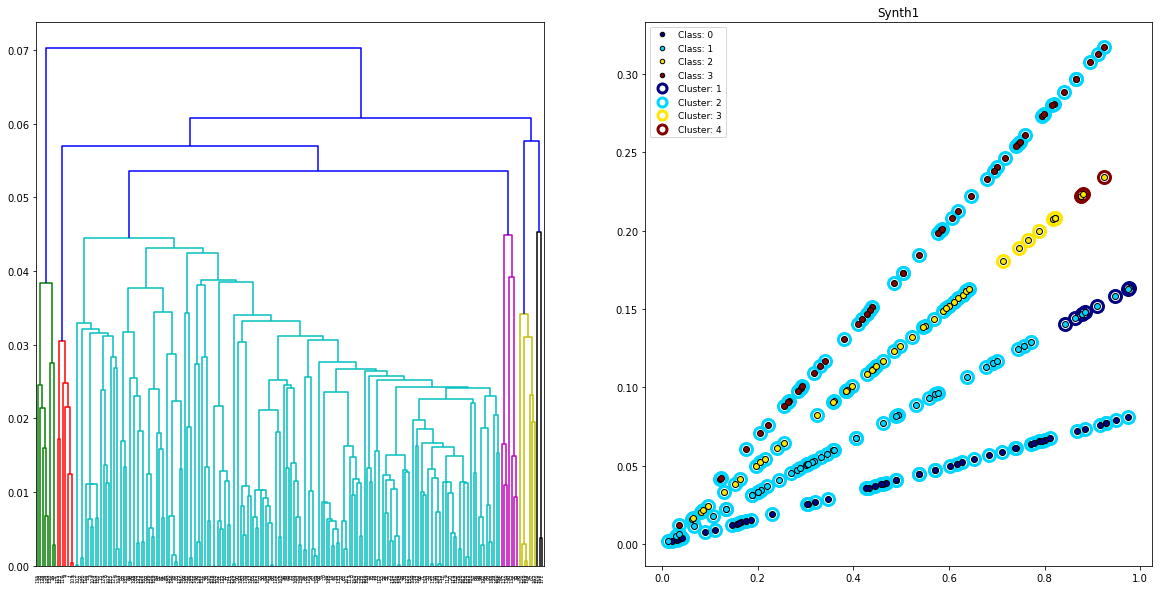

------------------------------------ Dataset = synth3 ----------------------------------


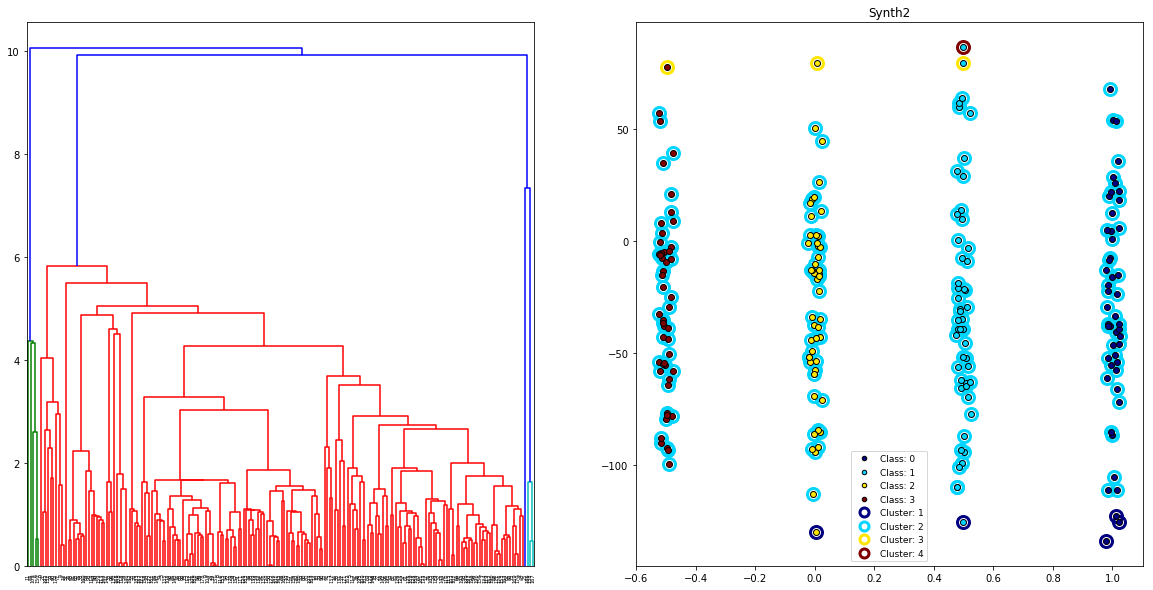

------------------------------------ Dataset = synth4 ----------------------------------


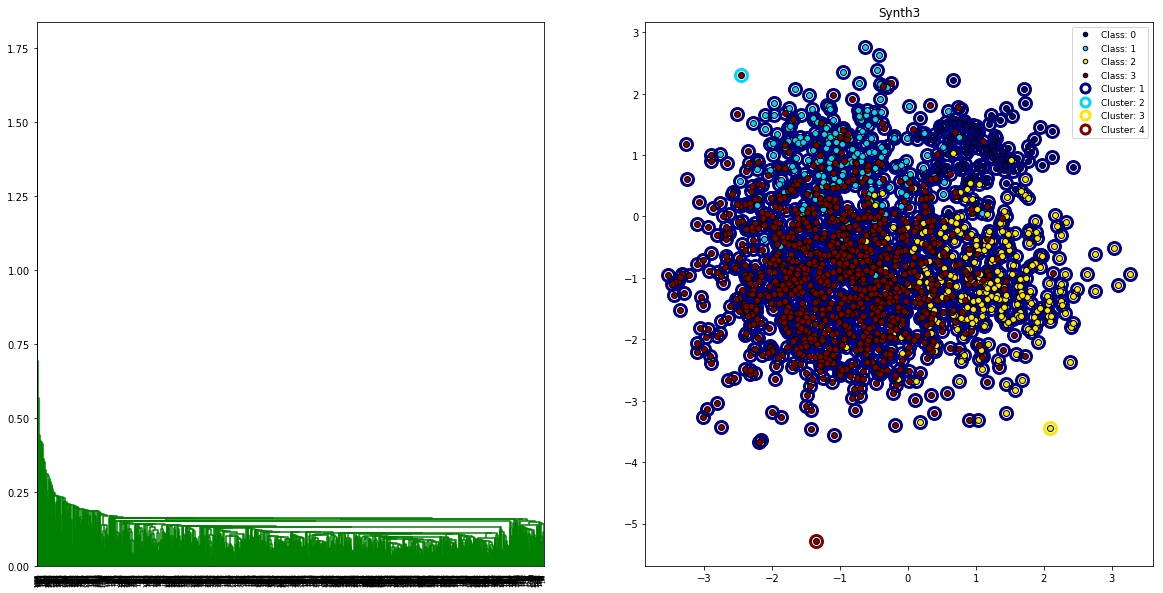

----------------------------------------------------------------------------------------
---------------------------------- METHOD = complete link --------------------------------
----------------------------------------------------------------------------------------
------------------------------------ Dataset = synth2 ----------------------------------


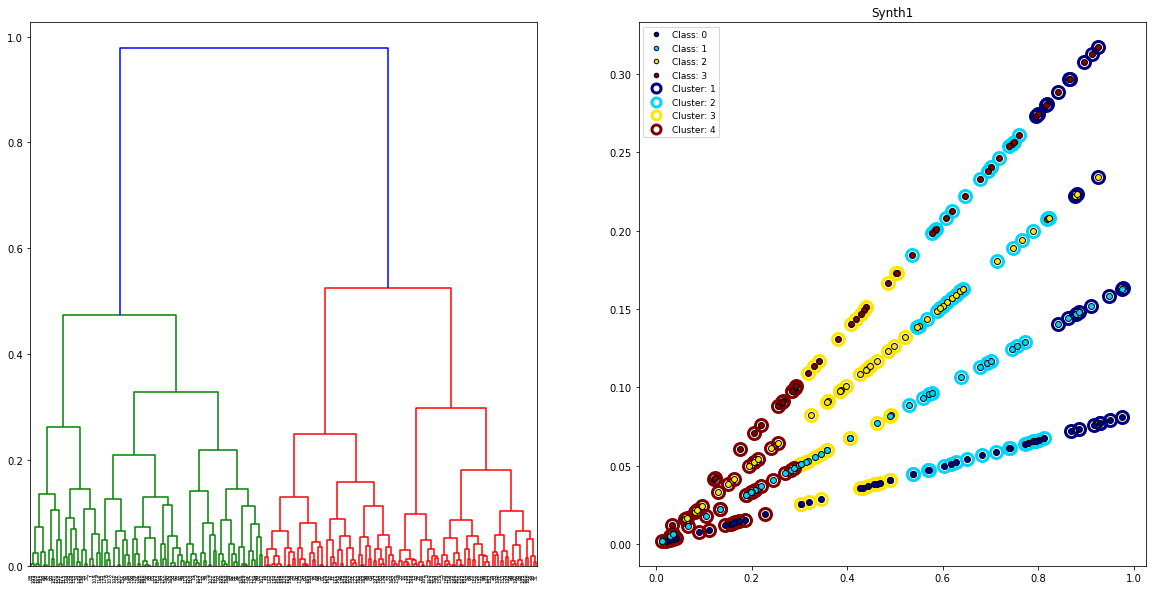

------------------------------------ Dataset = synth3 ----------------------------------


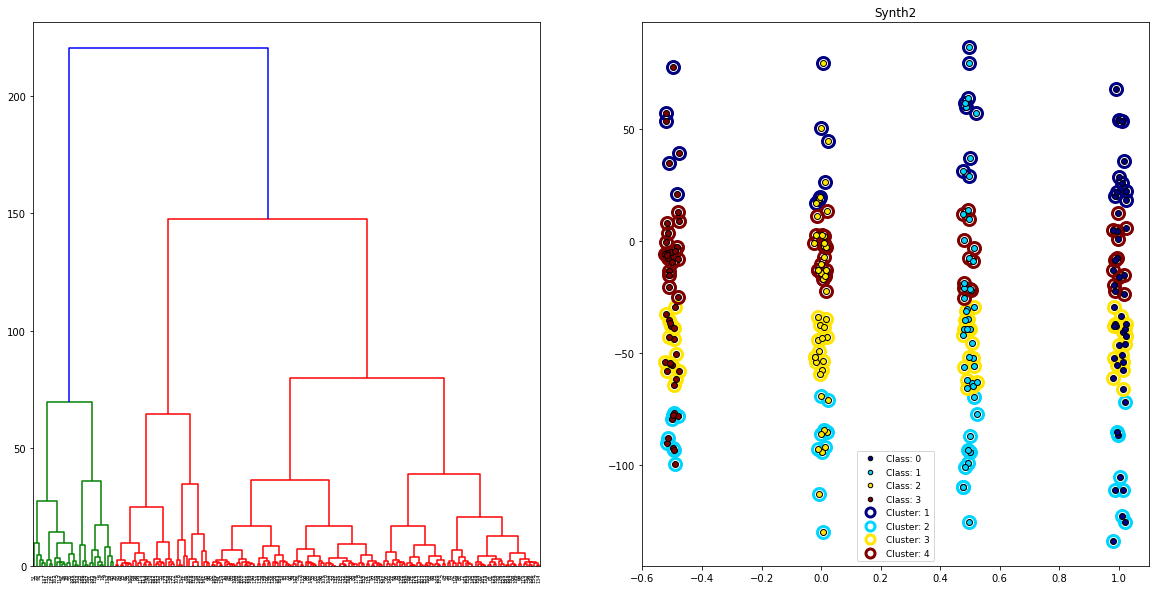

------------------------------------ Dataset = synth4 ----------------------------------


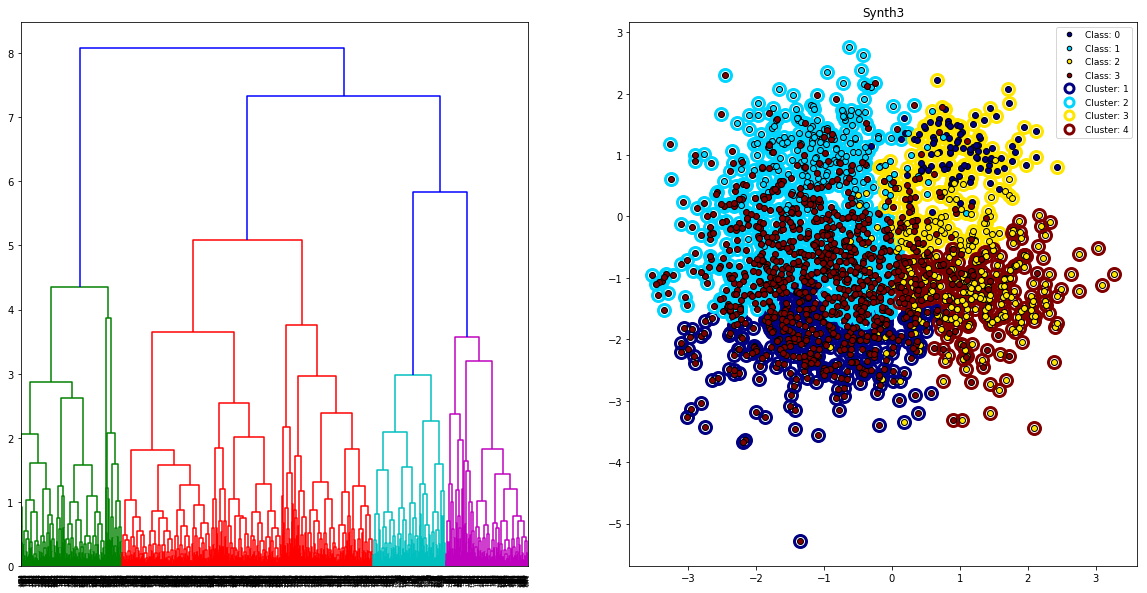

----------------------------------------------------------------------------------------
---------------------------------- METHOD = average link --------------------------------
----------------------------------------------------------------------------------------
------------------------------------ Dataset = synth2 ----------------------------------


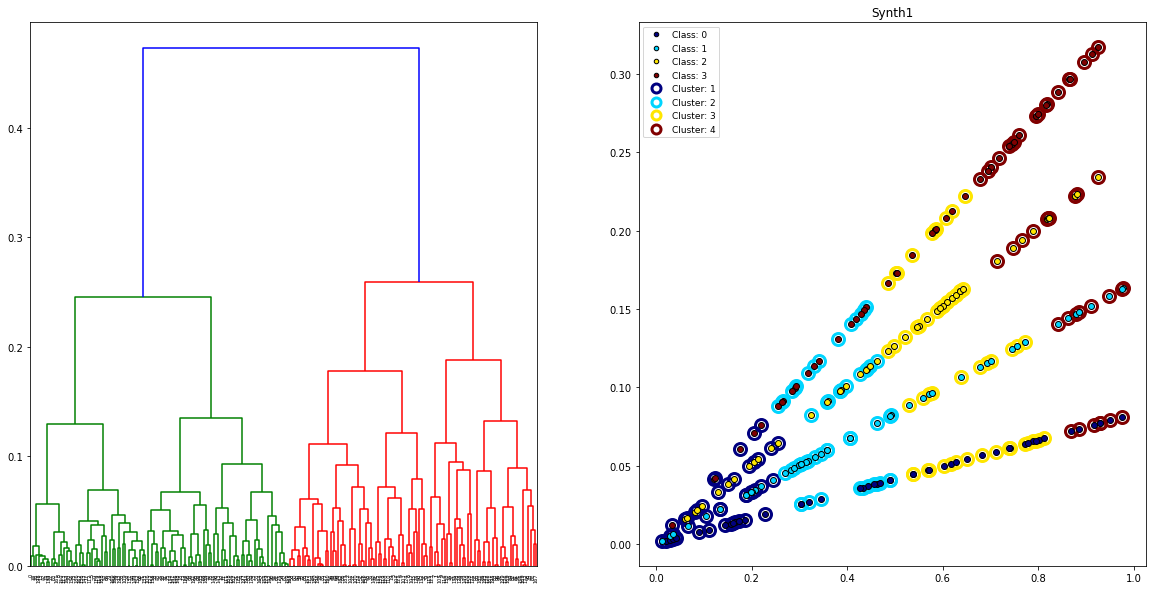

------------------------------------ Dataset = synth3 ----------------------------------


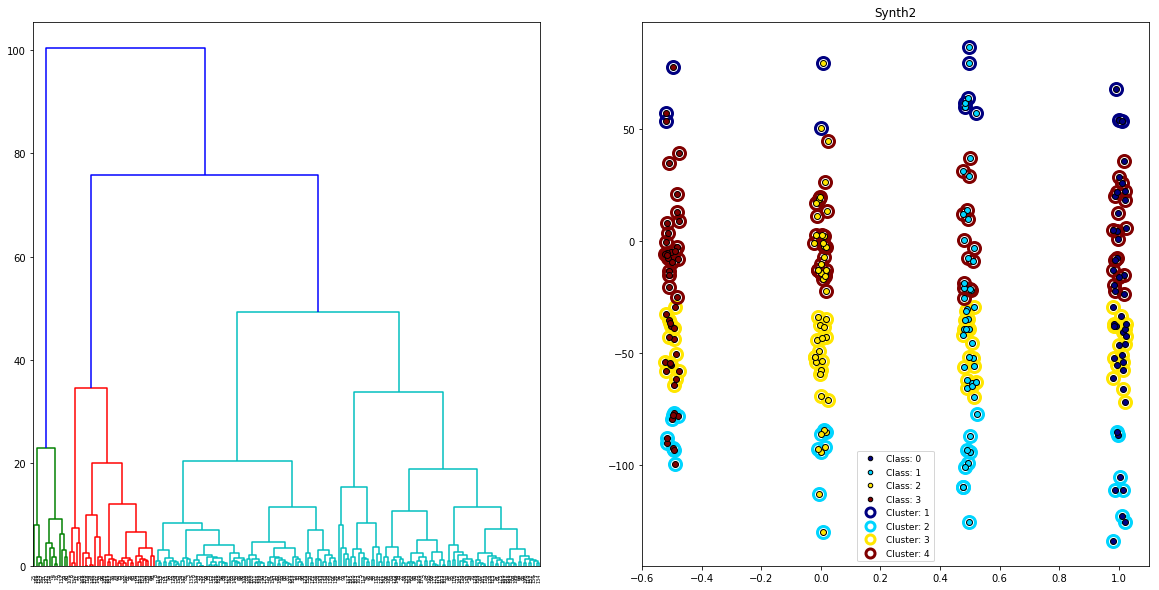

------------------------------------ Dataset = synth4 ----------------------------------


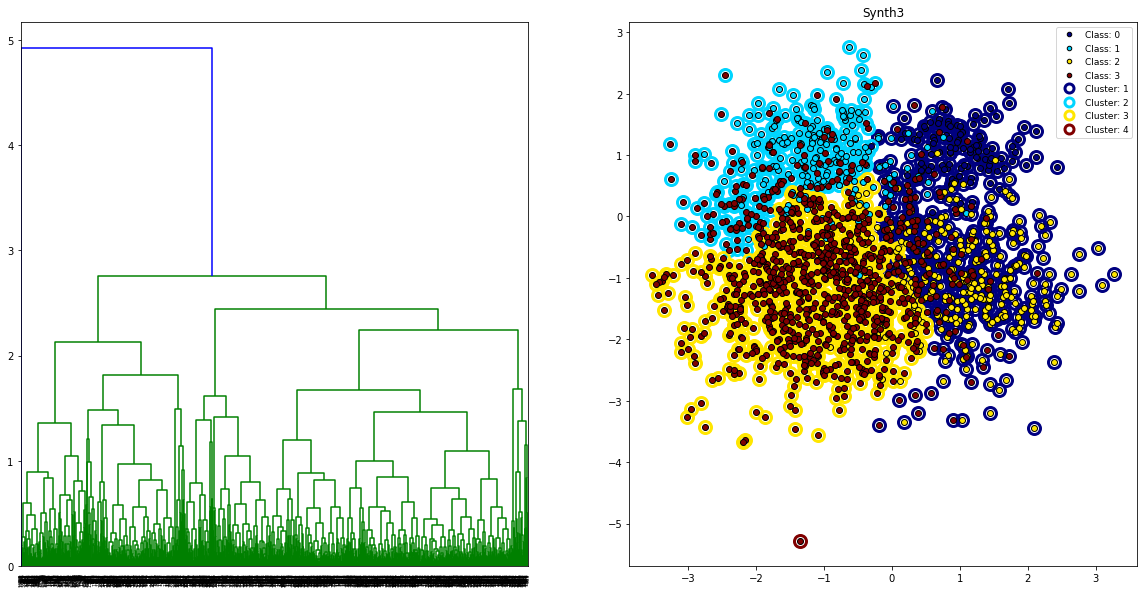

In [304]:
print('For all of the plots below, the dendrogram is on the left and a scatterplot of clustering at the 4-cluster level is on the right.')

for method in ['single', 'complete', 'average']:
    
    print('----------------------------------------------------------------------------------------') 
    print('---------------------------------- METHOD = '+method+' link --------------------------------')  
    print('----------------------------------------------------------------------------------------') 
    for i in range(3):
        print('------------------------------------ Dataset = synth'+str(i+2)+' ----------------------------------')
        synth=scipy.io.loadmat('Data/synth'+str(i+2)+'.mat')

        # perform the linkage and clustering
        Z = linkage(synth['X'], method=method, metric='euclidean')
        cls  = fcluster(Z, criterion='maxclust', t=4)



        plt.figure(figsize=(20,10)) 
        plt.subplot(1,2,1)
        dendrogram(Z)

        plt.subplot(1,2,2)
        clusterPlot(synth['X'],cls,y=synth['y'])

        plt.title('Synth'+str(i+1))
        plt.show()

    

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.